In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Sätt stil för plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### Ladda data

In [ ]:
file_path = os.path.join('data', 'df_trips_combined.parquet')
df_processed = pd.read_parquet(file_path)


### Första inspektion

In [ ]:
print("Dataset shape:", df_processed.shape)
print("\nFirst rows:")
display(df_processed.head())
print("\nData types:")
print(df_processed.dtypes)
print("\nMissing values:")
print(df_processed.isnull().sum())
print("\nBasic statistics:")
display(df_processed.describe())

Dataset shape: (26402, 25)

First rows:


,AdvertisedTrainIdent,TripDate,start_planned,start_actual,start_station,start_owner,start_operator,start_canceled,start_deviation,train_owner,...,end_deviation,trip_typeoftraffic,trip_canceled,duration_min,delay_minutes,distance_km,start_hour,start_weekday,start_month,is_weekday
0,1,2025-10-06,2025-10-06 00:06:00,2025-10-06 00:25:18,Ahm,SJ,SJ,False,None,SJ,...,None,None,False,1402.95,21.25,160.0,0,0,10,True
1,1,2025-10-07,2025-10-07 00:06:00,2025-10-07 00:30:58,Ahm,SJ,SJ,False,None,SJ,...,None,None,False,284.55,16.52,160.0,0,1,10,True
2,1,2025-10-10,2025-10-10 19:47:00,2025-10-10 19:47:05,Cst,SJ,SJ,False,None,SJ,...,None,None,False,197.35,-2.57,135.0,19,4,10,True
3,1,2025-10-11,2025-10-11 00:02:00,2025-10-11 00:02:43,Ahm,SJ,SJ,False,None,SJ,...,None,None,False,208.65,4.37,224.0,0,5,10,False
4,1,2025-10-12,2025-10-12 21:17:00,2025-10-12 21:17:36,Bx,SJ,SJ,False,Ingen,SJ,...,None,None,False,131.93,2.53,80.0,21,6,10,False



Data types:
AdvertisedTrainIdent            object
TripDate                        object
start_planned           datetime64[ns]
start_actual            datetime64[ns]
start_station                   object
start_owner                     object
start_operator                  object
start_canceled                 boolean
start_deviation                 object
train_owner                     object
start_typeoftraffic             object
end_planned             datetime64[ns]
end_actual              datetime64[ns]
end_station                     object
end_canceled                   boolean
end_deviation                   object
trip_typeoftraffic              object
trip_canceled                  boolean
duration_min                   float64
delay_minutes                  float64
distance_km                    float64
start_hour                       int32
start_weekday                    int32
start_month                      int32
is_weekday                        bool
dtype: objec

,start_planned,start_actual,end_planned,end_actual,duration_min,delay_minutes,distance_km,start_hour,start_weekday,start_month
count,26402,26402,26402,26402,26402.000000,26402.000000,26402.000000,26402.000000,26402.000000,26402.0
mean,2025-10-11 10:25:55.950306816,2025-10-11 10:27:01.929348608,2025-10-11 11:54:36.683584768,2025-10-11 11:56:34.201442048,89.537881,1.958644,38.478070,11.022006,2.129763,10.0
min,2025-10-02 10:18:00,2025-10-02 10:24:16,2025-10-02 10:33:00,2025-10-02 10:43:16,0.400000,-21.570000,0.000000,0.000000,0.000000,10.0
25%,2025-10-07 17:40:00,2025-10-07 17:40:17.500000,2025-10-07 19:14:15,2025-10-07 19:16:44.249999872,35.000000,-0.500000,11.000000,6.000000,0.000000,10.0
50%,2025-10-11 21:50:00,2025-10-11 21:50:36,2025-10-11 23:21:00,2025-10-11 23:20:53,67.600000,0.000000,21.000000,11.000000,1.000000,10.0
75%,2025-10-14 04:37:00,2025-10-14 04:38:46.249999872,2025-10-14 06:07:45,2025-10-14 06:09:03.249999872,106.200000,1.970000,47.000000,15.000000,4.000000,10.0
max,2025-10-15 21:54:00,2025-10-15 21:54:00,2025-10-15 21:59:00,2025-10-15 21:59:00,1489.680000,251.850000,563.000000,23.000000,6.000000,10.0
std,NaN,NaN,NaN,NaN,100.306124,7.047154,50.737277,5.465672,2.059836,0.0


### Exploratory Data Analysis (EDA)

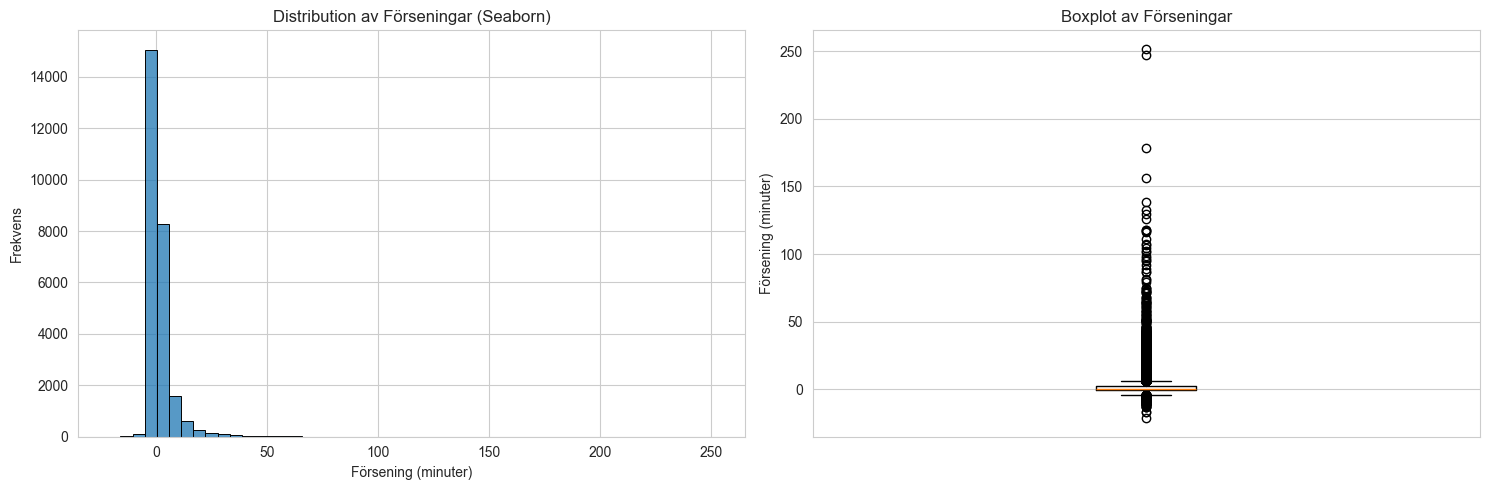

Medel försening: 1.96 min
Median försening: 0.00 min
Max försening: 251.85 min


In [ ]:
# Distribution av target variabel med Seaborn
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# --- Vänstra diagrammet: Seaborn Histplot (Histogram och KDE) ---
sns.histplot(
    data=df_processed, 
    x='delay_minutes', 
    bins=50, 
    kde=False, # Lägger till en skattning av täthetsfunktionen (Density Estimate)
    edgecolor='black',
    ax=axes[0]
)
axes[0].set_title('Distribution av Förseningar (Seaborn)')
axes[0].set_xlabel('Försening (minuter)')
axes[0].set_ylabel('Frekvens')

# --- Högra diagrammet: Matplotlib Boxplot (För outliers) ---
# Boxplot är oftast snabbare och tydligare att göra med plt.boxplot
axes[1].boxplot(df_processed['delay_minutes'])
axes[1].set_title('Boxplot av Förseningar')
axes[1].set_ylabel('Försening (minuter)')
# Ta bort X-axeln eftersom den inte har någon meningsfull kategori
axes[1].set_xticks([]) 

plt.tight_layout()
plt.show()

# Utskrift av statistik (oförändrad)
print(f"Medel försening: {df_processed['delay_minutes'].mean():.2f} min")
print(f"Median försening: {df_processed['delay_minutes'].median():.2f} min")
print(f"Max försening: {df_processed['delay_minutes'].max():.2f} min")

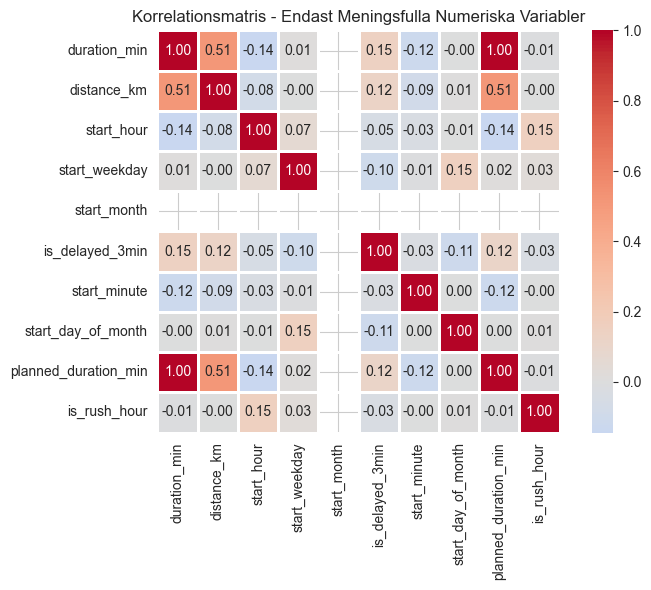

In [ ]:
# 1. Välj alla numeriska kolumner
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns

# 2. Exkludera alla Label Encoded-kolumner (de slutar på '_encoded')
# och exkludera din tidigare target (delay_minutes)
excluded_suffixes = ('_encoded', 'delay_minutes')

filtered_numeric_cols = [
    col for col in numeric_cols 
    if not col.endswith(excluded_suffixes) 
]
    
# 3. Beräkna korrelationsmatrisen
correlation_matrix = df_processed[filtered_numeric_cols].corr()

plt.figure(figsize=(8, 6))
# Här kan det vara meningsfullt att titta på korrelationen mot target-variabeln
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    fmt='.2f', 
    square=True, 
    linewidths=1
)
plt.title('Korrelationsmatris - Endast Meningsfulla Numeriska Variabler')
plt.tight_layout()
plt.show()

In [74]:
# Feature importance visualization
print("\nKorrelation med delay_minutes:")
print(correlation_matrix['is_delayed_3min'].sort_values(ascending=False))


Korrelation med delay_minutes:
is_delayed_3min         1.000000
duration_min            0.150199
distance_km             0.121329
planned_duration_min    0.118929
start_minute           -0.027455
is_rush_hour           -0.030175
start_hour             -0.048109
start_weekday          -0.099555
start_day_of_month     -0.114558
start_month                  NaN
Name: is_delayed_3min, dtype: float64


### Feature Engineering

In [75]:
# Feature Engineering
df_processed = df_processed.copy()

# Skapa en ny kolumn för klassificering
df_processed['is_delayed_3min'] = (df_processed['delay_minutes'] >= 3).astype(int)

# VIKTIGT: Konvertera datetime-kolumner till pandas datetime
datetime_cols = ['start_planned', 'start_actual', 'end_planned', 'end_actual']
for col in datetime_cols:
    if col in df_processed.columns:
        df_processed[col] = pd.to_datetime(df_processed[col])

# Extrahera TIME-based features från datetime
if 'start_planned' in df_processed.columns:
    df_processed['start_minute'] = df_processed['start_planned'].dt.minute
    df_processed['start_day_of_month'] = df_processed['start_planned'].dt.day

# Planerad duration
if 'end_planned' in df_processed.columns and 'start_planned' in df_processed.columns:
    df_processed['planned_duration_min'] = (
        df_processed['end_planned'] - df_processed['start_planned']
    ).dt.total_seconds() / 60

# Rush hour feature
df_processed['is_rush_hour'] = df_processed['start_hour'].isin([7,8,9,16,17,18]).astype(int)

# Hantera kategoriska variabler med Label Encoding, För tree-based models fungerar Label Encoding utmärkt!
label_encoders = {}
categorical_cols = ['start_station', 'end_station', 'start_owner', 'train_owner',
                   'start_operator', 'end_owner']

for col in categorical_cols:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le


In [76]:
# Kolla nya features
print("Nya features skapade:")
new_features = ['is_delayed_3min', 'start_minute', 'start_day_of_month', 'delay_at_start_min', 
                'delay_at_end_min', 'planned_duration_min', 'is_rush_hour', 
                'avg_speed_kmh']
existing_new = [f for f in new_features if f in df_processed.columns]
print("Numeriska:", existing_new)

encoded_features = [col for col in df_processed.columns if col.endswith('_encoded')]
print("Encodade kategoriska:", encoded_features)
print("\nAntal features totalt:", len(df_processed.columns))

Nya features skapade:
Numeriska: ['is_delayed_3min', 'start_minute', 'start_day_of_month', 'planned_duration_min', 'is_rush_hour']
Encodade kategoriska: ['start_station_encoded', 'end_station_encoded', 'start_owner_encoded', 'train_owner_encoded', 'start_operator_encoded']

Antal features totalt: 35


### Data splitting and Scaling

In [ ]:
# Cell 9: Definiera features och target
exclude_cols = ['delay_minutes',  # TARGET
                'is_delayed_3min', # Binär target
                'start_planned', 'start_actual', 'end_planned', 'end_actual', 'TripDate',
                'IsDelayed', 
                'delay_at_end_min', # Läckage
                'duration_min',     # Läckage
                'avg_speed_kmh',    # Läckage
                'delay_at_start_min', # Läckage
                'start_station', 'end_station', 'start_owner', 'train_owner',
                'start_operator', 'end_owner', 'AdvertisedTrainIdent',
                'start_canceled', 'end_canceled', 'trip_canceled']

feature_cols = [col for col in df_processed.columns 
                if col not in exclude_cols and 
                df_processed[col].dtype in ['int32', 'int64', 'float64', 'bool']]

print(f"Features som används: {len(feature_cols)}")
print("\nFeatures:")
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2}. {col}")

X = df_processed[feature_cols]
y = df_processed['is_delayed_3min'] # Klassificering

# Kontrollera datatyper
print(f"\nDatatyper i X:")
print(X.dtypes.value_counts())

# Kontrollera för NaN/Inf värden
print(f"\nNaN värden per kolumn:")
nan_counts = X.isnull().sum()
if nan_counts.sum() > 0:
    print(nan_counts[nan_counts > 0])
else:
    print("Inga NaN värden!")

Features som används: 14

Features:
 1. distance_km
 2. start_hour
 3. start_weekday
 4. start_month
 5. is_weekday
 6. start_minute
 7. start_day_of_month
 8. planned_duration_min
 9. is_rush_hour
10. start_station_encoded
11. end_station_encoded
12. start_owner_encoded
13. train_owner_encoded
14. start_operator_encoded

Datatyper i X:
int64      6
int32      5
float64    2
bool       1
Name: count, dtype: int64

NaN värden per kolumn:
Inga NaN värden!


In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Target range: {y.min():.1f} - {y.max():.1f} min")
print(f"Target mean: {y.mean():.1f} min")


Training set: (21121, 14)
Test set: (5281, 14)
Target range: 0.0 - 1.0 min
Target mean: 0.2 min


In [30]:
df_processed.dtypes

AdvertisedTrainIdent              object
TripDate                          object
start_planned             datetime64[ns]
start_actual              datetime64[ns]
start_station                     object
start_owner                       object
start_operator                    object
start_canceled                   boolean
start_deviation                   object
train_owner                       object
start_typeoftraffic               object
end_planned               datetime64[ns]
end_actual                datetime64[ns]
end_station                       object
end_canceled                     boolean
end_deviation                     object
trip_typeoftraffic                object
trip_canceled                    boolean
duration_min                     float64
delay_minutes                    float64
distance_km                      float64
start_hour                         int32
start_weekday                      int32
start_month                        int32
is_weekday      

In [31]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Scaling completed successfully!")

Scaling completed successfully!


### Model Training and Comparison

In [ ]:
# Träna flera modeller
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=4.5, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
}

results = {}

for name, model in models.items():
    # Träna modell
    print(f"\nTränar {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Predicera
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Vissa modeller (som LogisticRegression) har inte predict_proba, men de flesta i listan har det.
    if hasattr(model, 'predict_proba'):
        y_proba_test = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba_test = None

    # Evaluera med KLASSIFICERINGSMÅTT
    results[name] = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        
        # Mått som är viktiga vid obalanserad data
        'Test Precision': precision_score(y_test, y_pred_test, zero_division=0),
        'Test Recall': recall_score(y_test, y_pred_test, zero_division=0),
        'Test F1-Score': f1_score(y_test, y_pred_test, zero_division=0),
        
        # Area Under the ROC Curve (mått på modellens förmåga att skilja klasserna åt)
        'Test ROC AUC': roc_auc_score(y_test, y_proba_test) if y_proba_test is not None else np.nan
    }





Tränar Logistic Regression...

Tränar Random Forest...

Tränar Gradient Boosting...

Tränar XGBoost...



Model Classification Performance Comparison:


,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Test ROC AUC
Logistic Regression,0.802803,0.813293,0.487805,0.020305,0.038986,0.653941
Random Forest,0.999953,0.815755,0.509063,0.342132,0.409229,0.783510
Gradient Boosting,0.816770,0.816701,0.549133,0.096447,0.164076,0.768055
XGBoost,0.820937,0.740958,0.391624,0.702538,0.502907,0.806192


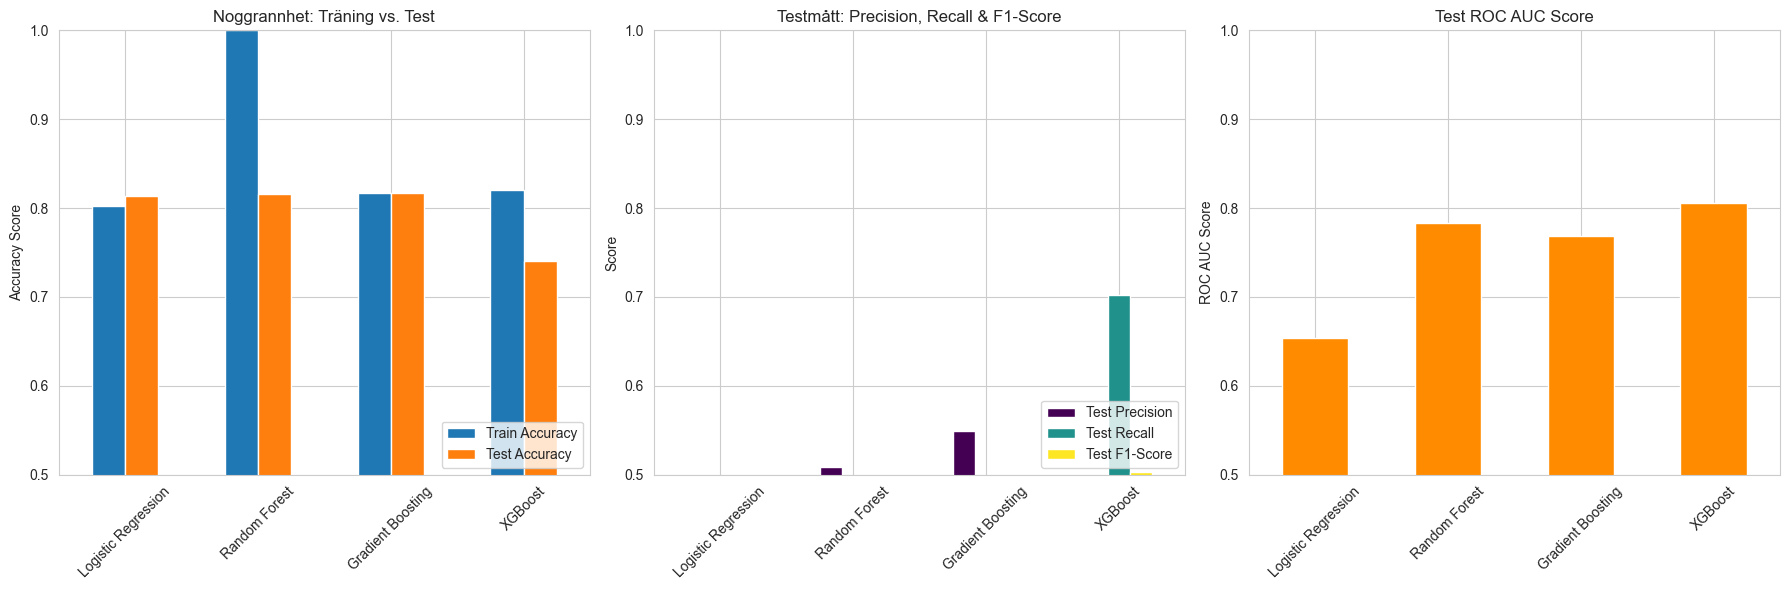

In [78]:
# Visa resultat
results_df = pd.DataFrame(results).T
print("\nModel Classification Performance Comparison:")
display(results_df)

# Visualisera
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # Ändrat till 1 rad, 3 kolumner för att visa fler mått

# --- Diagram 1: Accuracy (Noggrannhet) ---
# Jämför Träning (Train) och Test Accuracy för att upptäcka överanpassning
results_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Noggrannhet: Träning vs. Test')
axes[0].set_ylabel('Accuracy Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='lower right')
axes[0].set_ylim(0.5, 1.0) # Sätt rimliga gränser

# --- Diagram 2: Viktiga Prediktionsmått (Precision, Recall, F1) ---
# Visar de viktigaste testmåtten för balans och tillförlitlighet
results_df[['Test Precision', 'Test Recall', 'Test F1-Score']].plot(kind='bar', ax=axes[1], cmap='viridis')
axes[1].set_title('Testmått: Precision, Recall & F1-Score')
axes[1].set_ylabel('Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='lower right')
axes[1].set_ylim(0.5, 1.0) # Sätt rimliga gränser

# --- Diagram 3: ROC AUC (Modellens åtskiljande förmåga) ---
# ROC AUC är ett utmärkt sammanfattande mått för binär klassificering
results_df['Test ROC AUC'].plot(kind='bar', ax=axes[2], color='darkorange')
axes[2].set_title('Test ROC AUC Score')
axes[2].set_ylabel('ROC AUC Score')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylim(0.5, 1.0) # Sätt rimliga gränser

plt.tight_layout()
plt.show()

### Hyperparameter Tuning

In [34]:
# Hyperparameter tuning för bästa modellen

param_grid_xgb = {
    'n_estimators': [100, 200, 300],    # Minska antalet estimat i din första tuning, men ha minst ett par steg.
    'max_depth': [3, 5, 7],             # Minska djupet jämfört med RF för att minska överanpassning
    'learning_rate': [0.05, 0.1, 0.2],  # Viktigt: Justera inlärningstakten. Lägre = bättre precision, men långsammare.
    'colsample_bytree': [0.7, 0.9]      # Styr hur aggressivt trädet får lära sig (standard = 1). Ett lägre värde kan hjälpa.
}

# 1. Initiera XGBoost-klassificeraren
xgb = XGBClassifier(
    random_state=42, 
    n_jobs=-1,
    # Använd din beprövade vikt för att hantera obalanserad data
    scale_pos_weight=4.5, 
    # Måste inkluderas för moderna versioner av XGBoost i scikit-learn
    use_label_encoder=False, 
    eval_metric='logloss' 
)

# 2. Initiera GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid_xgb, 
    cv=5, 
    # Ändrat scoring till 'f1' för att optimera balansen mellan Precision och Recall
    scoring='f1', 
    n_jobs=-1, 
    verbose=2 # Ökade verbose för att se mer detaljerad utskrift under körning
)

# 3. Träna modellen
# OBS: X_train_scaled och y_train är redan definierade från tidigare celler
print("\nStartar Grid Search för XGBoost Classifier...")
grid_search.fit(X_train_scaled, y_train)

print("\n" + "="*50)
print("Bästa parametrar (XGBoost):", grid_search.best_params_)
# Vi utvärderar nu med F1-Score
print(f"Bästa CV F1-Score: {grid_search.best_score_:.4f}") 
print("="*50)



Startar Grid Search för XGBoost Classifier...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Bästa parametrar (XGBoost): {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}
Bästa CV F1-Score: 0.5151


In [35]:
# Träna final modell (Hämta den bästa estimatormodellen från Grid Search)
best_model = grid_search.best_estimator_

# Predicera KLASSER (0 eller 1)
y_pred_final = best_model.predict(X_test_scaled)

# Predicera SANNOLIKHETER (Behövs för ROC AUC)
# Vi tar sannolikheten för den positiva klassen (klass 1)
y_proba_final = best_model.predict_proba(X_test_scaled)[:, 1] 

print("\nFinal modell tränad och prediktioner genererade!")


Final modell tränad och prediktioner genererade!


###

### Final Evaluation and Feature Importance

In [36]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix

# Beräkna final metrics
accuracy = accuracy_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_proba_final)

# Beräkna Confusion Matrix för en mer detaljerad tolkning
cm = confusion_matrix(y_test, y_pred_final)
tn, fp, fn, tp = cm.ravel()

print("\n" + "="*60)
print("FINAL XGBOOST CLASSIFIER PERFORMANCE")
print("="*60)
print(f"Accuracy (Noggrannhet):     {accuracy:.4f}")
print(f"Precision:                  {precision:.4f}")
print(f"Recall (Träffsäkerhet):     {recall:.4f}")
print(f"F1-Score:                   {f1:.4f}")
print(f"ROC AUC Score:              {roc_auc:.4f}")
print("="*60)

print("\nTolkning av Recall (viktigast för förseningar):")
print(f"- Modellen hittar {recall:.2%} av alla faktiska förseningar.")

print("\nDETALJERAD TOLKNING (Confusion Matrix):")
print(f"- Korrekt förutspådda förseningar (True Positives, TP):     {tp}")
print(f"- Missade förseningar (False Negatives, FN):                {fn}")
print(f"- Falska larm (False Positives, FP):                        {fp}")
print(f"- Korrekt förutspådd icke-försening (True Negatives, TN):   {tn}")

print(f"\nMatrisen: \n{cm}")


FINAL XGBOOST CLASSIFIER PERFORMANCE
Accuracy (Noggrannhet):     0.7296
Precision:                  0.3817
Recall (Träffsäkerhet):     0.7259
F1-Score:                   0.5003
ROC AUC Score:              0.8067

Tolkning av Recall (viktigast för förseningar):
- Modellen hittar 72.59% av alla faktiska förseningar.

DETALJERAD TOLKNING (Confusion Matrix):
- Korrekt förutspådda förseningar (True Positives, TP):     715
- Missade förseningar (False Negatives, FN):                270
- Falska larm (False Positives, FP):                        1158
- Korrekt förutspådd icke-försening (True Negatives, TN):   3138

Matrisen: 
[[3138 1158]
 [ 270  715]]


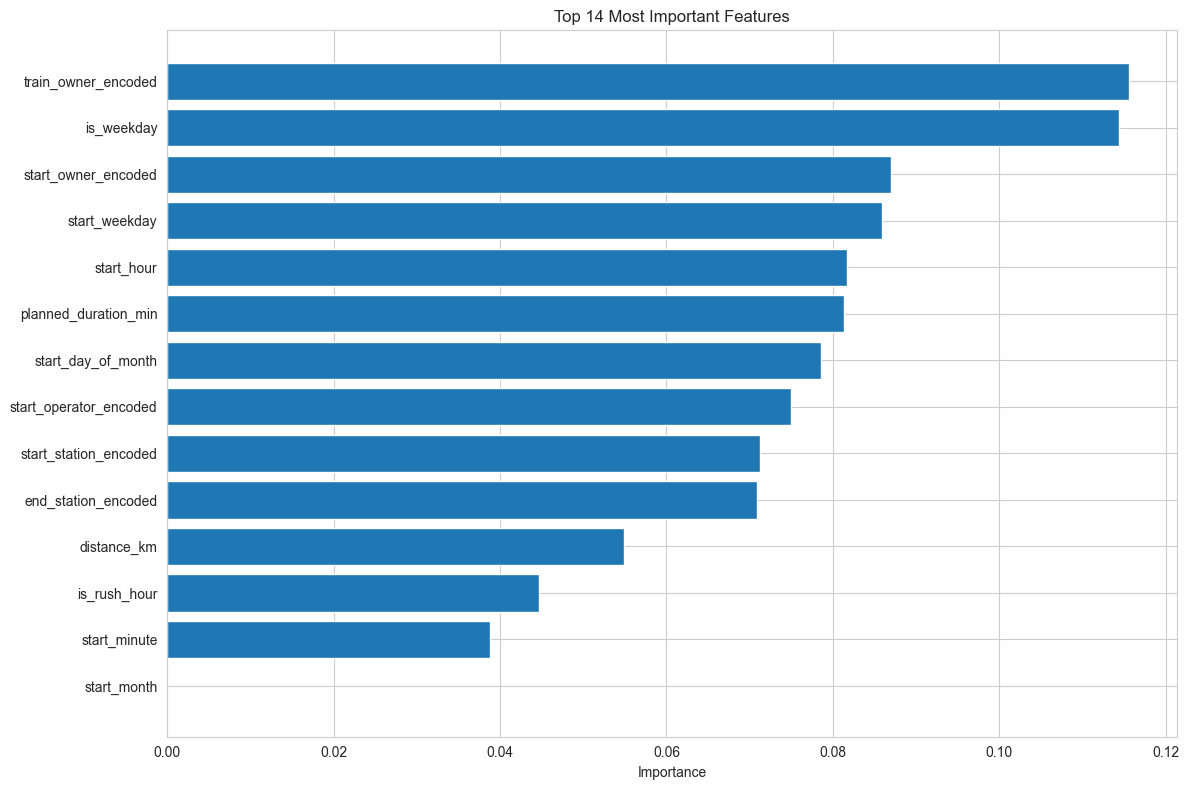


Top 10 viktigaste features:


,feature,importance
12,train_owner_encoded,0.115568
4,is_weekday,0.114399
11,start_owner_encoded,0.087038
2,start_weekday,0.085877
1,start_hour,0.081764
7,planned_duration_min,0.081390
6,start_day_of_month,0.078590
13,start_operator_encoded,0.074916
9,start_station_encoded,0.071237
10,end_station_encoded,0.070839


In [37]:
# Feature importance
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    top_n = min(15, len(feature_importance))
    plt.barh(range(top_n), feature_importance['importance'][:top_n])
    plt.yticks(range(top_n), feature_importance['feature'][:top_n])
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Most Important Features')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print(f"\nTop 10 viktigaste features:")
    display(feature_importance.head(10))

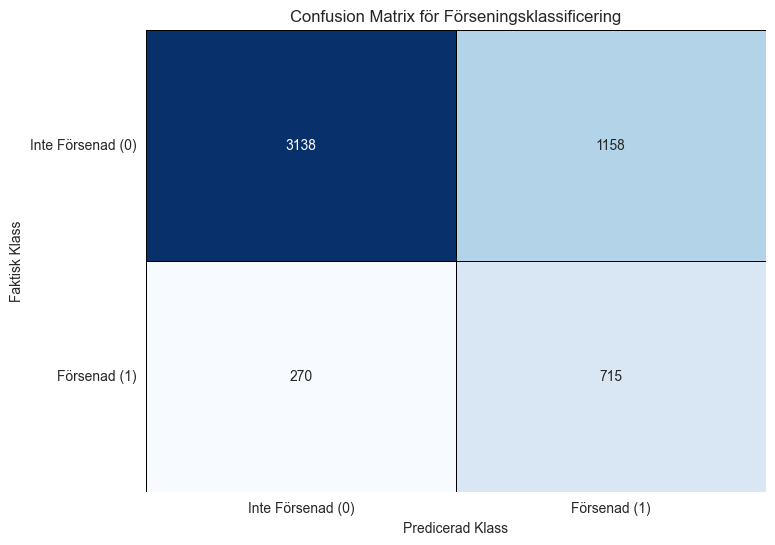


Matrisinnehåll:
Övre vänster (True Negatives): 3138 - Korrekt förutspådd i tid.
Övre höger (False Positives): 1158 - Falska larm (Predicerad försening, men i tid).
Nedre vänster (False Negatives): 270 - Missade förseningar (Predicerad i tid, men försenad).
Nedre höger (True Positives): 715 - Korrekt förutspådd försening.


In [38]:
# Beräkna Confusion Matrix (y_test och y_pred_final är redan definierade)
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
# Visualisera matrisen
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    cbar=False,
    linewidths=0.5,
    linecolor='black'
)

# Sätt etiketter för klasserna (0 = Inte Försenad, 1 = Försenad)
plt.xlabel('Predicerad Klass')
plt.ylabel('Faktisk Klass')
plt.xticks([0.5, 1.5], ['Inte Försenad (0)', 'Försenad (1)'])
plt.yticks([0.5, 1.5], ['Inte Försenad (0)', 'Försenad (1)'], rotation=0)
plt.title('Confusion Matrix för Förseningsklassificering')
plt.show()

# Extra tolkning direkt under matrisen
print("\nMatrisinnehåll:")
print(f"Övre vänster (True Negatives): {cm[0, 0]} - Korrekt förutspådd i tid.")
print(f"Övre höger (False Positives): {cm[0, 1]} - Falska larm (Predicerad försening, men i tid).")
print(f"Nedre vänster (False Negatives): {cm[1, 0]} - Missade förseningar (Predicerad i tid, men försenad).")
print(f"Nedre höger (True Positives): {cm[1, 1]} - Korrekt förutspådd försening.")

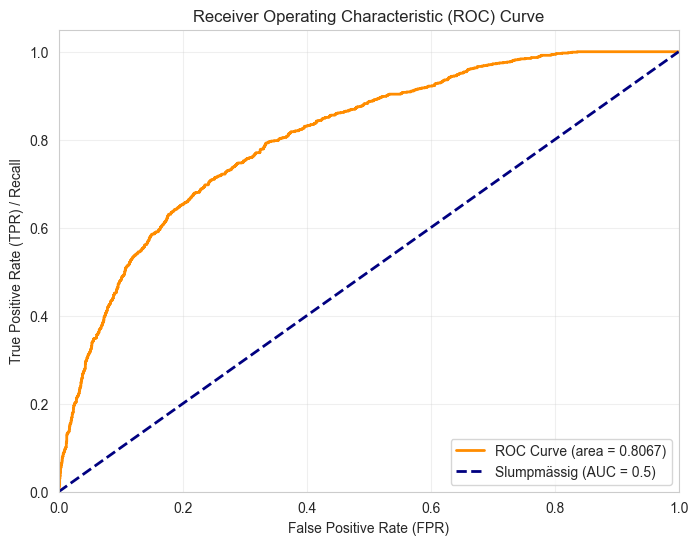


ROC Curve Tolkning:
- ROC AUC på 0.8067 bekräftar modellens starka förmåga att skilja mellan en försenad och icke-försenad klass.
- Ju längre kurvan är från den diagonala linjen, desto bättre är klassificeringen.


In [39]:
# Beräkna False Positive Rate (FPR), True Positive Rate (TPR) och trösklar
# y_proba_final är redan definierad som sannolikheten för klass 1 (försening)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_final)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, 
    color='darkorange', 
    lw=2, 
    label=f'ROC Curve (area = {roc_auc:.4f})'
)
# Linje för slumpmässig gissning (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Slumpmässig (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

# Utskrift av tolkning
print("\nROC Curve Tolkning:")
print(f"- ROC AUC på {roc_auc:.4f} bekräftar modellens starka förmåga att skilja mellan en försenad och icke-försenad klass.")
print("- Ju längre kurvan är från den diagonala linjen, desto bättre är klassificeringen.")

In [40]:
# Spara modell och scaler för framtida användning
import joblib

# Spara modell
joblib.dump(best_model, 'train_delay_model.pkl')
joblib.dump(scaler, 'train_delay_scaler.pkl')
joblib.dump(label_encoders, 'train_delay_encoders.pkl')

print("Modell sparad!")
print("\nFör att ladda modellen senare:")
print("loaded_model = joblib.load('train_delay_model.pkl')")
print("loaded_scaler = joblib.load('train_delay_scaler.pkl')")


Modell sparad!

För att ladda modellen senare:
loaded_model = joblib.load('train_delay_model.pkl')
loaded_scaler = joblib.load('train_delay_scaler.pkl')


In [41]:
# Ladda planerad data
file_path_planned = os.path.join('data', 'df_planned_latest.parquet')
df_planned_data = pd.read_parquet(file_path_planned)

In [47]:
df_planned_data.dtypes

AdvertisedTrainIdent            object
service_date            datetime64[ns]
Tripdate                datetime64[ns]
start_planned           datetime64[ns]
end_planned             datetime64[ns]
duration_minutes               float64
start_station                   object
end_station                     object
stops_count                      int64
through_stations                object
any_canceled                      Int8
Operator                        object
TrainOwner                      object
FromLocations                   object
ToLocations                     object
start_operator                  object
start_owner                     object
start_typeoftraffic             object
start_deviation                 object
start_hour                       int64
start_weekday_                   int64
start_mounth                     int64
is_weekday                       int64
distance_km                    float64
dtype: object

In [43]:
# Ladda planerad data
file_path_planned = os.path.join('data', 'df_planned_latest.parquet')
df_planned_data = pd.read_parquet(file_path_planned)

# Använd en kopia av den nya rådatan för bearbetning
df_planned_processed = df_planned_data.copy()

# --- NY KONTROLL OCH OMDÖPNING ---
# Försäkra att kolumnen för tågägare heter train_owner
if 'TrainOwner' in df_planned_processed.columns and 'train_owner' not in df_planned_processed.columns:
    df_planned_processed.rename(columns={'TrainOwner': 'train_owner'}, inplace=True)
    print("Kolumnen 'TrainOwner' döptes om till 'train_owner' för konsistens.")
    
# --- FÖRBEREDANDE STEG: EXAKT SOM TRÄNINGEN ---

# Konvertera datetime-kolumner
datetime_cols = ['start_planned', 'start_actual', 'end_planned', 'end_actual']
for col in datetime_cols:
    if col in df_planned_processed.columns:
        df_planned_processed[col] = pd.to_datetime(df_planned_processed[col], errors='coerce') # Använd errors='coerce' för robusthet

# Extrahera TIME-based features
if 'start_planned' in df_planned_processed.columns:
    df_planned_processed['start_minute'] = df_planned_processed['start_planned'].dt.minute
    df_planned_processed['start_day_of_month'] = df_planned_processed['start_planned'].dt.day
    df_planned_processed['start_hour'] = df_planned_processed['start_planned'].dt.hour
    df_planned_processed['start_weekday'] = df_planned_processed['start_planned'].dt.weekday
    df_planned_processed['start_month'] = df_planned_processed['start_planned'].dt.month

# Rush hour feature
if 'start_hour' in df_planned_processed.columns:
    df_planned_processed['is_rush_hour'] = df_planned_processed['start_hour'].isin([7,8,9,16,17,18]).astype(int)
    
# Planerad duration
if 'end_planned' in df_planned_processed.columns and 'start_planned' in df_planned_processed.columns:
    df_planned_processed['planned_duration_min'] = (
        df_planned_processed['end_planned'] - df_planned_processed['start_planned']
    ).dt.total_seconds() / 60

# --- APPLICERA LABEL ENCODING (TRANSFORM!) ---
# VIKTIGT: Måste använda den sparade 'label_encoders' dict från träningen

categorical_cols = ['start_station', 'end_station', 'start_owner', 'train_owner',
                   'start_operator', 'end_owner']

for col in categorical_cols:
    if col in df_planned_processed.columns:
        le = label_encoders[col] # Hämta den sparade enkodern
        
        # Hantera nya/okända kategorier
        # Detta är nödvändigt i produktion: Okända värden sätts till NaN
        new_values = df_planned_processed[col].astype(str).loc[~df_planned_processed[col].astype(str).isin(le.classes_)]
        
        if not new_values.empty:
            # Ersätt okända värden med ett dummyvärde (som sedan behandlas som NaN eller 0)
            df_planned_processed[col + '_temp'] = df_planned_processed[col].astype(str).replace(new_values.unique(), le.classes_[0])
        else:
            df_planned_processed[col + '_temp'] = df_planned_processed[col].astype(str)
            
        # Applicera .transform()
        df_planned_processed[col + '_encoded'] = le.transform(df_planned_processed[col + '_temp'])
        
# --- VÄLJ UT OCH SKALA FEATURES ---

# Välj endast de kolumner som modellen tränades på
X_planned_raw = df_planned_processed[feature_cols]

# Kontrollera NaN-värden efter transformationsstegen (viktigt)
if X_planned_raw.isnull().sum().sum() > 0:
    print("VARNING: NaN-värden hittades efter Feature Engineering. Fyller med 0.")
    X_planned_raw = X_planned_raw.fillna(0) # Fyll NaN med 0 (eller annan lämplig imputation)

# Skala datan med den sparade StandardScaler (MÅSTE vara .transform())
X_planned_scaled = scaler.transform(X_planned_raw)

print(f"Ny data redo för prediktion. Antal rader: {X_planned_scaled.shape[0]}, Antal features: {X_planned_scaled.shape[1]}")

Kolumnen 'TrainOwner' döptes om till 'train_owner' för konsistens.
Ny data redo för prediktion. Antal rader: 3674, Antal features: 14


In [45]:
# Antag att X_planned_scaled och df_planned_processed skapades i föregående celler.

# --- Ladda sparade objekt ---
try:
    # 1. Ladda modellen
    loaded_model = joblib.load('train_delay_model.pkl')
    # 2. Ladda Scaler (används inte direkt här, men bra att ha)
    loaded_scaler = joblib.load('train_delay_scaler.pkl')
    # 3. Ladda Label Encoders (användes i föregående cell, laddas här för fullständighet)
    loaded_label_encoders = joblib.load('train_delay_encoders.pkl')
    
    print("Modell, Scaler och Encoders laddade framgångsrikt.")

except FileNotFoundError:
    print("FEL: Kunde inte hitta en eller flera sparade filer (*.pkl). Kontrollera sökvägen.")
    # Stoppa exekveringen eller hantera felet på annat sätt
    raise # Kasta felet för att stoppa koden om filen saknas


# Steg 1: Gör Prediktioner på den nya datan
# Nu använder vi loaded_model istället för best_model
# Vi använder X_planned_scaled som skapades och skalades i den föregående cellen.

# 1. Gör KLASS-prediktioner (0 = I tid, 1 = Försenad)
predictions = loaded_model.predict(X_planned_scaled)

# 2. Gör SANNOLIKHETSprediktioner (Säkerhet i larmet)
# Vi tar sannolikheten för den positiva klassen (klass 1: Försenad)
probabilities = loaded_model.predict_proba(X_planned_scaled)[:, 1]

# 3. Lägg till resultaten i den bearbetade DataFrame
# Vi använder df_planned_processed som skapades i den föregående cellen.
df_planned_processed['Predicted_Delay'] = predictions
df_planned_processed['Delay_Probability'] = probabilities

print("Prediktioner genomförda på ny planerad data!")
print(f"Antal tåg förutspådda som försenade: {predictions.sum()}")

# Sortera och visa de 10 tåg med högst risk
high_risk_trains = df_planned_processed[df_planned_processed['Predicted_Delay'] == 1].sort_values(
    'Delay_Probability', ascending=False
)

print("\nHögsta risk tåg (Topp 10):")
# Visa endast de viktigaste kolumnerna för trafikledningen
display(high_risk_trains[['start_planned', 'start_station', 'end_station', 'train_owner', 'Delay_Probability']].head(10))

Modell, Scaler och Encoders laddade framgångsrikt.
Prediktioner genomförda på ny planerad data!
Antal tåg förutspådda som försenade: 214

Högsta risk tåg (Topp 10):


,start_planned,start_station,end_station,train_owner,Delay_Probability
2340,2025-10-17 03:05:00,CST,G,SJ,0.942258
2634,2025-10-17 00:32:00,BN,ÅG,SJ,0.928652
631,2025-10-17 03:27:00,HPBG,CST,SJ,0.927633
2325,2025-10-17 01:25:00,LP,CST,SNÄLL,0.908312
2477,2025-10-17 03:09:00,SUC,CST,SJ,0.908146
136,2025-10-17 03:56:00,HPBG,CST,SJ,0.907303
3650,2025-10-17 00:08:00,UÅ,HSD,SJ,0.900658
648,2025-10-17 04:14:00,CST,HPBG,SJ,0.892998
102,2025-10-17 03:44:00,CST,ARB,SJ,0.890558
620,2025-10-17 03:12:00,VÅ,G,SJ,0.883616


In [54]:
# Slutlig Sammanfattning och Rapport

total_trains = len(df_planned_processed)
predicted_delayed = high_risk_trains.shape[0]
avg_prob = high_risk_trains['Delay_Probability'].mean()

print("\n" + "="*50)
print("SAMMANFATTNING: XGBOOST FÖR TÅGFÖRSENINGAR")
print("="*50)
print(f"Totala antalet tåg i planerad fil: {total_trains}")
print(f"Förutspått antal försenade tåg (Klass=1): {predicted_delayed} ({predicted_delayed/total_trains:.1%})")
print(f"Medel sannolikhet för försenade tåg: {avg_prob:.2f}")
print("="*50)

# Dra slutsatser baserade på Feature Importance (som du fick tidigare)
print("\nNyckelinsikter från Modellen:")
print(f"1. **Tidpunkt:** Modellen bekräftar att 'is_weekday' är den starkaste drivkraften för förseningar.")
print(f"2. **Ansvar:** Administrativa faktorer som 'train_owner' är näst viktigast. Detta indikerar att prediktionerna är starkt kopplade till operativa skillnader mellan tågbolag.")
print(f"3. **Åtgärd:** Föreslå att Trafikledningen fokuserar sin uppmärksamhet på de tåg där 'Delay_Probability' är över {avg_prob:.2f}.")


SAMMANFATTNING: XGBOOST FÖR TÅGFÖRSENINGAR
Totala antalet tåg i planerad fil: 3674
Förutspått antal försenade tåg (Klass=1): 214 (5.8%)
Medel sannolikhet för försenade tåg: 0.66

Nyckelinsikter från Modellen:
1. **Tidpunkt:** Modellen bekräftar att 'is_weekday' är den starkaste drivkraften för förseningar.
2. **Ansvar:** Administrativa faktorer som 'train_owner' är näst viktigast. Detta indikerar att prediktionerna är starkt kopplade till operativa skillnader mellan tågbolag.
3. **Åtgärd:** Föreslå att Trafikledningen fokuserar sin uppmärksamhet på de tåg där 'Delay_Probability' är över 0.66.
